In [2]:
import math
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

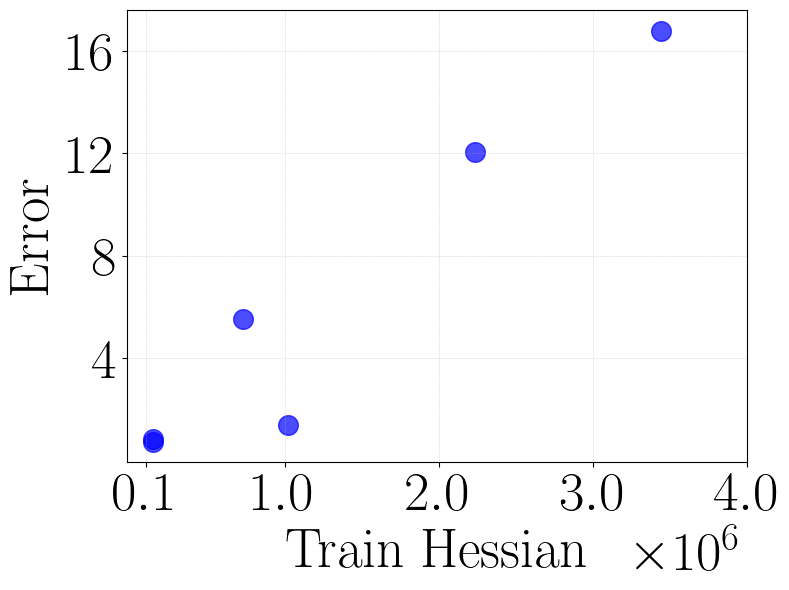

In [28]:
import matplotlib.ticker as mticker
train_hessian = [
    141584, 1020717, 3443463,   # quad1 subset 0.9 (sgd)
    145288, 727576, 2230874,    # quad1 subset 0.8 (sgd)
]

datamodels_norm_error = [
    0.74, 1.38, 16.8,    # quad1 subset 0.9 (sgd)
    0.85, 5.54, 12.06,   # quad1 subset 0.8 (sgd)
]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(train_hessian, datamodels_norm_error, color='blue', alpha=0.7, s=200)

#plt.xscale('log')  # Hessians vary widely, log scale makes it clearer
plt.xlabel(r"$\mathrm{Train~Hessian}$", fontsize=40)
plt.xticks([1e5, 1e6, 2e6, 3e6, 4e6], fontsize=40)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.offsetText.set_fontsize(40)

plt.ylabel(r"$\mathrm{Error}$", fontsize=40)
plt.yticks([4, 8, 12, 16], fontsize=40)
#plt.title("Connection between Train Hessian and Datamodels Normalized Error", fontsize=40)
plt.grid(lw=0.4, ls=":")
plt.tight_layout()

plt.savefig("hessian_datamodel.pdf", format="pdf", dpi=1200)
plt.show()
